# Doğrusal Destek Vektör Regresyonu (SVR)

Amaç, bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek şekilde doğru ya da eğriyi belirlemektir. Smola (1996) ve Drucker (1997)

\begin{gather*}
\large y = wx + b + \epsilon
\end{gather*}


#### Minimizasyon Problemi:

\begin{gather*}
\large  \frac{1}{2} \|w\|^2 + C \sum_{i=1}^m (\xi_i + \xi_i^*) 
\end{gather*}

#### Kısıtlar:

\begin{gather*}
\large y_i - (w * x_i) - b \leq \epsilon + \xi_i
\large (w * x_i) + b - y_i \leq \epsilon + \xi_i^*
\end{gather*}


$ \xi_i + \xi_i^* \geq 0 $

$ i = 1,...,m $

$ \xi $ : artıkları ifade eder

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

## Veri Önişleme

In [2]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df.select_dtypes(["object"])) 
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype("float64")
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# tek değişken ile eğitim için veri seti
X_train_1 = pd.DataFrame(X_train["Hits"])
X_test_1 = pd.DataFrame(X_test["Hits"])

## Model

In [3]:
svr_model = SVR("linear").fit(X_train_1, y_train)

In [4]:
svr_model.predict(X_train_1)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [5]:
print("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


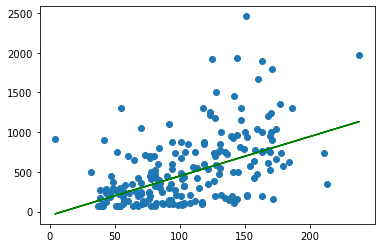

In [6]:
y_pred = svr_model.predict(X_train_1)
plt.scatter(X_train_1, y_train)
plt.plot(X_train_1, y_pred, c='g');

## Tahmin

In [7]:
y_pred = svr_model.predict(X_test_1)
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

## Tuning

In [8]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}
svr_cv = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train_1, y_train)

In [9]:
pd.Series(svr_cv.best_params_)[0]

0.1

In [10]:
svr_tuned = SVR("linear", C=pd.Series(svr_cv.best_params_)[0]).fit(X_train_1, y_train)

In [11]:
y_pred = svr_tuned.predict(X_test_1)
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [12]:
# tüm değişkenler için işlem
svr_params = {"C": np.arange(0.1, 2, 0.3)}
svr_cv = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [13]:
svr_tuned = SVR("linear", C=pd.Series(svr_cv.best_params_)[0]).fit(X_train, y_train)

In [14]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

367.5385297249052

# Doğrusal Olmayan Destek Vektör Regresyonu (SVR)

## Veri Ön İşleme

In [15]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df.select_dtypes(["object"])) 
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype("float64")
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model

In [16]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

## Tahmin

In [17]:
y_pred = svr_rbf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Tuning

In [18]:
svr_params = {"C": [0.1, 0.4, 5, 10, 20, 40, 50]}
svr_cv = GridSearchCV(svr_rbf, svr_params, cv = 10).fit(X_train_1, y_train) 

In [19]:
pd.Series(svr_cv.best_params_)[0]

40

In [20]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv.best_params_)[0]).fit(X_train, y_train)

In [21]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

429.05089855101517

## Kaynaklar

### Kurslar
* https://www.udemy.com/course/python-egitimi/